### EmployeeSQL

In [28]:
# import dependencies 

import pandas as pd
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Db password saved to an external file to gitignore it
from config import password


In [29]:
# Create engine
conn_str = 'postgresql://postgres:' + password + '@localhost:5432/employee_db'
engine = create_engine(conn_str)
conn= engine.connect()

print(conn)

In [9]:
# read the table and create the data frame
employees_df = pd.read_sql_table("employees", conn)
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [10]:
# read the salaries table and create the data frame
salary_df = pd.read_sql_table("salaries", conn)
salary_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [11]:
# read the title table and create data frame
title_df = pd.read_sql_table ("titles", conn)
title_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


In [12]:
# merge employees and salary data frames
emp_salary_df = pd.merge(employees_df, salary_df, on="emp_no", how="inner")
emp_salary_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,1996-08-03,1997-08-03
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,1995-12-03,1996-12-02
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228,1989-09-12,1990-09-12


In [13]:
# merge salary and title data frames
title_salary_df = pd.merge(title_df, salary_df, on = "emp_no", how="inner")
title_salary_df.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,NaT,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,NaT,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,NaT,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,NaT,40054,1986-12-01,1987-12-01


In [14]:
# select necessary columns and group by title
df = title_salary_df[["title", "salary"]]
df.head()

,title,salary
0,Senior Engineer,60117
1,Staff,65828
2,Senior Engineer,40006
3,Engineer,40054
4,Senior Engineer,40054


In [15]:
# find avarege salary by title
avg_salary_df = df.groupby(["title"], as_index=False).salary.mean()
avg_salary_df["salary"] = round(avg_salary_df["salary"],2)
avg_salary_df

,title,salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


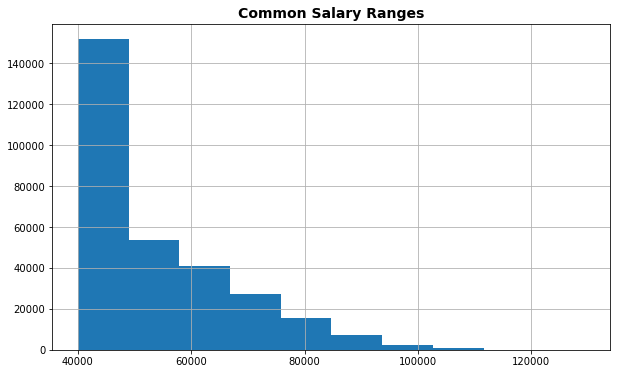

In [24]:
# create histogram for most common salary ranges for employees
plt.figure(figsize=(10,6))
emp_salary_df.salary.hist()
plt.title("Common Salary Ranges", fontsize= 14, fontweight="bold")
plt.savefig("images/salary_range.png")

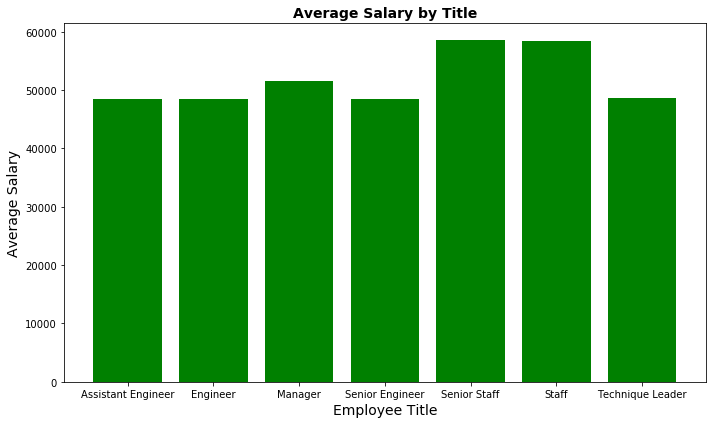

In [20]:
# create a bar plot for avarage salary by title
plt.figure(figsize=(10,6))
plt.bar(avg_salary_df["title"], avg_salary_df["salary"], align="center", color="green")
plt.xlabel("Employee Title", fontsize=14)
plt.ylabel("Average Salary", fontsize=14)
plt.title("Average Salary by Title", fontsize=14, fontweight="bold")
# save the figure
plt.tight_layout()
plt.savefig("images/avg_salary.png")

In [25]:
emp_salary_df.loc[emp_salary_df["emp_no"] ==499942]

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
299966,499942,1963-01-10,April,Foolsday,F,1997-02-10,40000,1998-03-28,1999-03-28
